#Development Mode [P1---P37] numerical

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
from sklearn import svm, linear_model
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

def get_restaurant_count(data):
    return data.groupby('City').size()

def get_restaurant_count_feature(data, count):
    Restaurant_Count = np.zeros((len(data), 1))
    for i in range(0, len(data)):
        if(data['City'][i] in count.keys()):
            Restaurant_Count[i] = count[data['City'][i]]
        else:
            Restaurant_Count[i] = 0
    data['Restaurant Count'] = Restaurant_Count
    return data

def postprocess(data):
    Period = np.zeros((len(data), 1))
    d1 = datetime.strptime('04/15/2015', "%m/%d/%Y")
    for i in range(0,len(data)):
        d2 = datetime.strptime(data['Open Date'][i], "%m/%d/%Y")
        Period[i] = np.floor((d1 - d2).days/30) #in months

    data['Period'] = Period
    data = data.drop('Open Date',1)
    
    data = pd.concat([data, data['City Group'].str.get_dummies()], axis = 1)
    data = pd.concat([data, data.Type.str.get_dummies()], axis = 1)        
#     data = pd.concat([data, data.City.str.get_dummies()], axis = 1)
    
    return data

train = pd.read_csv('/home/naeemul/Dropbox/Kaggle/TFI/train.csv')
test = pd.read_csv('/home/naeemul/Dropbox/Kaggle/TFI/test.csv')

count = get_restaurant_count(train.append(test))
train = get_restaurant_count_feature(train, count)
test = get_restaurant_count_feature(test, count)

train = postprocess(train)
test = postprocess(test)

train_FC = train.loc[train['Type'] == 'FC']
train_IL = train.loc[train['Type'] == 'IL']
test_FC = test.loc[test['Type'] == 'FC']
test_IL = test.loc[test['Type'] != 'FC']

# for i in range(0, len(train.columns)):
#     print(i, train.columns[i])

# for i in range(0, len(test.columns)):
#     print(i, test.columns[i])    

features_FC = train.columns[4:17]|train.columns[22:27]|train.columns[31:33]|train.columns[42:45]
cat_features = [14, 15, 16, 17, 18, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37]
for i in cat_features:
    temp = pd.get_dummies(train_FC['P'+str(i)], prefix = 'P'+str(i))
    train_FC = pd.concat([train_FC, temp], axis = 1)
    features_FC = features_FC|temp.columns[1:len(temp.columns)]

# print(features_FC)

features_IL = train.columns[4:41]|train.columns[43:45]
# print(features_IL)

train_IL[features_IL] = train_IL[features_IL].apply(lambda x:np.log(x+1))

iteration = 3
rfr_cv_list = []

for i in range(0, iteration):
    clf = RandomForestRegressor(n_estimators=200)#linear_model.LinearRegression()#(n_estimators = 200)#SVR(C=1.0, epsilon=0.2)#KernelRidge(alpha=1.0)
    rfr_cv = np.sqrt(abs(cross_val_score(clf, train_IL[features_IL], train_IL.revenue, cv=4, scoring='mean_squared_error').mean()))
    rfr_cv_list += [rfr_cv]   
    
print("rfr_CV: ", np.mean(rfr_cv_list))

rfr_cv_list = []

for i in range(0, iteration):
    clf = RandomForestRegressor(n_estimators = 200)#GradientBoostingRegressor(n_estimators=200, max_features='auto')#AdaBoostRegressor(n_estimators=200, loss='linear')#linear_model.LinearRegression()#SVR(C=1.0, epsilon=0.2)#KernelRidge(alpha=1.0)
    rfr_cv = np.sqrt(abs(cross_val_score(clf, train_FC[features_FC], train_FC.revenue, cv=4, scoring='mean_squared_error').mean()))
    rfr_cv_list += [rfr_cv]   
    
print("rfr_CV: ", np.mean(rfr_cv_list))


rfr_CV:  1763630.23514
rfr_CV:  2951618.09884


/home/naeemul/anaconda3/lib/python3.4/site-packages/pandas/core/frame.py:2138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


#Development Mode [P14---P18], [P24---P27], [P30---P37] categorical

In [46]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from datetime import datetime
from sklearn.cross_validation import cross_val_score
np.set_printoptions(threshold=np.nan)
pd.set_option('display.max_columns', None)

def postprocess(data):
    Period = np.zeros((len(data), 1))
    d1 = datetime.strptime('04/15/2015', "%m/%d/%Y")
    for i in range(0,len(data)):
        d2 = datetime.strptime(data['Open Date'][i], "%m/%d/%Y")
        Period[i] = (d1 - d2).days

    data['Period'] = Period
    return data

train = pd.read_csv('/home/naeemul/Dropbox/Kaggle/TFI/train.csv')
test = pd.read_csv('/home/naeemul/Dropbox/Kaggle/TFI/test.csv')

train = postprocess(train)
test = postprocess(test)

data = train.append(test)

features = data.columns[4:9]|data.columns[14:20]|data.columns[24:27]|data.columns[35:42]

# data = pd.concat([data, data.Type.str.get_dummies()], axis = 1)
data = pd.concat([data, data.City.str.get_dummies()], axis = 1)
# data = pd.concat([data, data['City Group'].str.get_dummies()], axis = 1)

for i in range(14,19):
    temp = pd.get_dummies(data['P'+str(i)], prefix = 'P'+str(i))
    data = pd.concat([data, temp], axis = 1)

for i in range(24,28):
    temp = pd.get_dummies(data['P'+str(i)], prefix = 'P'+str(i))
    data = pd.concat([data, temp], axis = 1)

for i in range(30,38):
    temp = pd.get_dummies(data['P'+str(i)], prefix = 'P'+str(i))
    data = pd.concat([data, temp], axis = 1)    

features = features|data.columns[44:len(data.columns)]
train, test = data[:137], data[137:len(data)]
data = train

iteration = 20
rfr_cv_list = []

for i in range(0, iteration):
    clf = RandomForestRegressor(n_estimators = 200)#SVR(C=1.0, epsilon=0.2)#KernelRidge(alpha=1.0)
    rfr_cv = np.sqrt(abs(cross_val_score(clf, data[features], data.revenue, cv=4, scoring='mean_squared_error').mean()))
    rfr_cv_list += [rfr_cv]   
    
print("rfr_CV: ", np.mean(rfr_cv_list))

# clf.fit(data[features], data.revenue) #Feature Selection
# importances = clf.feature_importances_
# std = np.std([tree.feature_importances_ for tree in clf.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(len(features)):
#     print("%d. feature %d %s (%f)" % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))


rfr_CV:  2460446.18797


#Submission: FC_IL separate model

In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
from sklearn import svm
from sklearn.cross_validation import cross_val_score

def get_restaurant_count(data):
    return data.groupby('City').size()

def get_restaurant_count_feature(data, count):
    Restaurant_Count = np.zeros((len(data), 1))
    for i in range(0, len(data)):
        if(data['City'][i] in count.keys()):
            Restaurant_Count[i] = count[data['City'][i]]
        else:
            Restaurant_Count[i] = 0
    data['Restaurant Count'] = Restaurant_Count
    return data

def postprocess(data):
    Period = np.zeros((len(data), 1))
    d1 = datetime.strptime('04/15/2015', "%m/%d/%Y")
    for i in range(0,len(data)):
        d2 = datetime.strptime(data['Open Date'][i], "%m/%d/%Y")
        Period[i] = np.floor((d1 - d2).days/30) #in months

    data['Period'] = Period
    data = data.drop('Open Date',1)
    
    data = pd.concat([data, data['City Group'].str.get_dummies()], axis = 1)
    data = pd.concat([data, data.Type.str.get_dummies()], axis = 1)        
    
    return data

train = pd.read_csv('/home/naeemul/Dropbox/Kaggle/TFI/train.csv')
test = pd.read_csv('/home/naeemul/Dropbox/Kaggle/TFI/test.csv')

count = get_restaurant_count(train.append(test))
train = get_restaurant_count_feature(train, count)
test = get_restaurant_count_feature(test, count)

train = postprocess(train)
test = postprocess(test)

train_FC = train.loc[train['Type'] == 'FC']
train_IL = train.loc[train['Type'] == 'IL']
test_FC = test.loc[test['Type'] == 'FC']
test_IL = test.loc[test['Type'] != 'FC']

features_FC = train.columns[4:17]|train.columns[22:27]|train.columns[31:33]|train.columns[42:45]

features_IL = train.columns[4:41]|train.columns[43:45]

iteration = 20

predictions = np.zeros((len(test_FC),iteration))
for i in range(0, iteration):
    clf = RandomForestRegressor(n_estimators = 200)#SVR(C=1.0, epsilon=0.2)#KernelRidge(alpha=1.0)
    clf.fit(train_FC[features_FC], train_FC.revenue)
    prediction = clf.predict(test_FC[features_FC])
    predictions[:,i] = prediction
    
test_FC['Prediction'] = predictions.mean(axis=1)

predictions = np.zeros((len(test_IL),iteration))
for i in range(0, iteration):
    clf = RandomForestRegressor(n_estimators = 200)#SVR(C=1.0, epsilon=0.2)#KernelRidge(alpha=1.0)
    clf.fit(train_IL[features_IL], train_IL.revenue)
    prediction = clf.predict(test_IL[features_IL])
    predictions[:,i] = prediction
    
test_IL['Prediction'] = predictions.mean(axis=1)

test = pd.concat([test_FC, test_IL])
test = test.sort(['Id'], ascending=[1])
test.to_csv('FC_IL.csv', columns=['Id', 'Prediction'])

test.columns



#Submission Mode [P14---P18], [P24---P27], [P30---P37] categorical

In [49]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from datetime import datetime
from sklearn.cross_validation import cross_val_score
np.set_printoptions(threshold=np.nan)
pd.set_option('display.max_columns', None)

def postprocess(data):
    Period = np.zeros((len(data), 1))
    d1 = datetime.strptime('04/15/2015', "%m/%d/%Y")
    for i in range(0,len(data)):
        d2 = datetime.strptime(data['Open Date'][i], "%m/%d/%Y")
        Period[i] = (d1 - d2).days

    data['Period'] = Period
    return data

train = pd.read_csv('/home/naeemul/Dropbox/Kaggle/TFI/train.csv')
test = pd.read_csv('/home/naeemul/Dropbox/Kaggle/TFI/test.csv')

train = postprocess(train)
test = postprocess(test)

data = train.append(test)

features = data.columns[4:9]|data.columns[14:20]|data.columns[24:27]|data.columns[35:42]

data = pd.concat([data, data.Type.str.get_dummies()], axis = 1)
# data = pd.concat([data, data.City.str.get_dummies()], axis = 1)
data = pd.concat([data, data['City Group'].str.get_dummies()], axis = 1)

for i in range(14,19):
    temp = pd.get_dummies(data['P'+str(i)], prefix = 'P'+str(i))
    data = pd.concat([data, temp], axis = 1)

for i in range(24,28):
    temp = pd.get_dummies(data['P'+str(i)], prefix = 'P'+str(i))
    data = pd.concat([data, temp], axis = 1)

for i in range(30,38):
    temp = pd.get_dummies(data['P'+str(i)], prefix = 'P'+str(i))
    data = pd.concat([data, temp], axis = 1)    

features = features|data.columns[44:len(data.columns)]
train, test = data[:137], data[137:len(data)]

iteration = 20
rfr_cv_list = []

predictions = np.zeros((len(test),iteration))
for i in range(0, iteration):
    clf = RandomForestRegressor(n_estimators = 200)#SVR(C=1.0, epsilon=0.2)#KernelRidge(alpha=1.0)
    clf.fit(train[features], train.revenue)
    prediction = clf.predict(test[features])
    predictions[:,i] = prediction
    
prediction = predictions.mean(axis=1)

file = open('RF_2_cat_14_24_30.csv','w')
file.write('Id,Prediction\n')
for i in range(0,len(prediction)):
    file.write(str(i)+','+str(prediction[i])+'\n')

file.close()


#Playground


In [100]:
#############################################################
# developed by rcarson
# aixueer4ever@gmail.com
# based on Dmitry Dryomov's tradeshift benchmark
############################################################

from sklearn.feature_extraction import DictVectorizer
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
data_dir=''
train = pd.read_csv(data_dir + 'train.csv')
test = pd.read_csv(data_dir + 'test.csv')

test.loc[test['City'] == 'Tanımsız']

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
195,195,08/13/2009,Tanımsız,Other,FC,4,5.0,4.0,5.0,1,5,5,4,5,5,1,3,5.0,0,0,0,0,0,5,5,5,5,1,0,0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0
216,216,07/07/2010,Tanımsız,Other,IL,12,4.0,4.0,4.0,1,3,5,4,5,10,3,10,7.5,3,4,4,3,4,3,5,1,4,1,3,4,0.0,1.0,5.0,3.0,1,3,5,2,0,0,5,1
247,247,11/26/2010,Tanımsız,Other,IL,5,5.0,4.0,4.0,2,3,5,4,4,5,1,4,4.0,0,0,0,0,0,4,5,1,3,3,0,0,0.0,0.0,4.0,2.0,0,0,0,0,0,0,0,0
417,417,05/06/2013,Tanımsız,Other,IL,2,3.0,4.0,4.0,1,3,5,5,4,5,1,5,5.0,0,0,0,0,0,1,1,1,2,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
720,720,07/10/2004,Tanımsız,Other,IL,2,3.0,4.0,4.0,1,5,5,4,4,4,5,5,4.0,2,2,4,2,4,5,5,2,2,3,5,3,2.0,0.0,2.0,2.0,3,5,4,3,5,5,4,3
938,938,08/23/2013,Tanımsız,Other,IL,12,7.5,4.5,6.0,4,4,10,10,10,10,4,10,7.5,0,0,6,3,0,1,3,3,4,5,6,0,7.5,12.5,7.5,7.5,0,0,0,0,0,0,12,0
1528,1528,08/03/2012,Tanımsız,Other,FC,1,2.0,2.0,5.0,2,2,5,4,4,5,3,4,4.0,0,0,0,0,0,4,2,1,2,1,2,1,2.0,3.0,3.0,2.0,0,0,0,0,0,0,0,0
1676,1676,06/20/2011,Tanımsız,Other,FC,4,5.0,4.0,3.0,2,5,5,5,5,5,2,5,5.0,0,4,0,3,4,5,5,2,5,1,0,3,0.0,1.0,3.0,3.0,5,0,5,3,0,4,0,0
1804,1804,08/27/1999,Tanımsız,Other,FC,1,5.0,4.0,3.0,2,2,5,5,5,5,5,3,5.0,0,0,0,0,0,2,4,1,1,1,0,0,0.0,0.0,2.0,3.0,0,5,0,0,0,0,0,0
1993,1993,08/28/2009,Tanımsız,Other,FC,1,2.0,4.0,7.5,1,4,5,5,5,8,1,5,6.0,0,0,0,0,12,1,2,1,2,1,0,0,5.0,0.0,10.0,0.0,0,0,0,0,0,0,0,0


#Rough/Whatever

In [60]:
a = []
b = 5
a = a + [b] + [10]
a
abs(np.mean(a))

7.5

##Tools

In [ ]:
missing_features = data.columns[14:19]|data.columns[24:28]|data.columns[30:38] #Imputation
temp = data[missing_features].replace('0', np.nan)
temp = temp.fillna(temp.median())
data[missing_features] = temp


clf.fit(data[features], data.revenue) #Feature Selection
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(features)):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))




#Plots

Type
FC    Axes(0.125,0.125;0.775x0.775)
IL    Axes(0.125,0.125;0.775x0.775)
Name: revenue, dtype: object

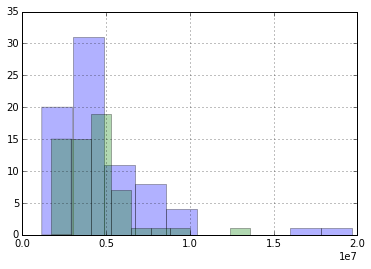

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from datetime import datetime
from sklearn.cross_validation import cross_val_score
np.set_printoptions(threshold=np.nan)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

def postprocess(data):
    Period = np.zeros((len(data), 1))
    d1 = datetime.strptime('04/15/2015', "%m/%d/%Y")
    for i in range(0,len(data)):
        d2 = datetime.strptime(data['Open Date'][i], "%m/%d/%Y")
        Period[i] = np.floor((d1 - d2).days/365)

    data['Period'] = Period
    return data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = postprocess(train)
test = postprocess(test)

# test.loc[test['Type'] == 'FC'].hist(figsize=(50,50), alpha= 0.5)

train.loc[train['Type'] != 'DT'].groupby('Type').revenue.hist(alpha = 0.3)

# from pandas.tools.plotting import scatter_matrix
# scatter_matrix(train.loc[train['Type'] == 'FC'], alpha=0.2, figsize=(50, 50), diagonal='kde')

<html>
    <h3>Feature Engineering</h3>
    <ul>
        <li>P9, P10</li>
        <li>P14, P15, P16, P17</li>
        <li>P11 numerical</li>
        <li>Separate model for each Type</li>
        <li>Consider MB and DT as FC</li>
        <li>P14---P18, P24---P27, P30---P30</li>
    </ul>
</html>